<a href="https://colab.research.google.com/github/abia200304/Distinct-Vehicle-Flow-Prediction-/blob/main/DBN_PEMS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -o /content/my_pems_data.zip

Archive:  /content/my_pems_data.zip
   creating: my_pems_data/
  inflating: my_pems_data/pems_station_500011021_flow_04-01-2024_0600_to_04-07-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_04-08-2024_0600_to_04-14-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_04-15-2024_0600_to_04-21-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_04-22-2024_0600_to_04-28-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_04-29-2024_0600_to_05-05-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_05-06-2024_0600_to_05-12-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_05-13-2024_0600_to_05-19-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_05-20-2024_0600_to_05-26-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_05-27-2024_0600_to_06-02-2024_0600.csv  
  inflating: my_pems_data/pems_station_500011021_flow_06-03-2024_0600_to_06-09-202

In [ ]:

# display(processed_df)
# print(processed_df.shape)

In [ ]:
# from matplotlib import pyplot as plt
# processed_df['non_truck_flow'].plot(kind='hist', bins=20, title='non_truck_flow')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

# from matplotlib import pyplot as plt
# processed_df['truck_flow'].plot(kind='hist', bins=20, title='truck_flow')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# from glob import glob
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation # Added
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping # Added
# from tensorflow.keras.regularizers import l2 # Added
# import warnings
# warnings.filterwarnings('ignore')

# # --- Data Loading and Initial Processing (rest of your code as is) ---
# file_paths = glob('/content/my_pems_data/*.csv')
# all_data = []

# for file in file_paths:
#     try:
#         df = pd.read_csv(file, delimiter='\t')
#         df.columns = df.columns.str.strip()
#         if 'Flow (Veh/5 Minutes)' in df.columns and 'Truck Flow (Veh/5 Minutes)' in df.columns:
#             all_data.append(df[['Flow (Veh/5 Minutes)', 'Truck Flow (Veh/5 Minutes)']])
#         else:
#             print(f"Skipping {file}: Required columns not found")
#     except Exception as e:
#         print(f"Error reading {file}: {e}")

# if all_data:
#     combined_df = pd.concat(all_data, ignore_index=True)
#     print(f"Combined DataFrame shape: {combined_df.shape}")
# else:
#     print("No data found or processed. Exiting.")
#     exit() # Exit if no data to process

# def process_traffic_data(df):
#     processed_df = df.copy()

#     processed_df = processed_df.rename(columns={
#         'Flow (Veh/5 Minutes)': 'total_flow',
#         'Truck Flow (Veh/5 Minutes)': 'truck_flow' #renaming
#     })

#     if 'total_flow' not in processed_df.columns or 'truck_flow' not in processed_df.columns:
#         print("Error: Renaming of columns failed. Check original column names.")
#         return None

#     # Calculate Non-Truck Flow = Total Flow - Truck Flow
#     processed_df['non_truck_flow'] = processed_df['total_flow'] - processed_df['truck_flow']

#     # Handle any negative values
#     negative_mask = processed_df['non_truck_flow'] < 0
#     if negative_mask.sum() > 0:
#         print(f"⚠️ Warning: {negative_mask.sum()} rows have negative non-truck flow values")
#         processed_df.loc[negative_mask, 'non_truck_flow'] = 0

#     # Add time-based features (though 'time_index' might not be used directly in DBN input)
#     processed_df['time_index'] = range(len(processed_df))

#     return processed_df

# processed_df = process_traffic_data(combined_df)

# if processed_df is None:
#     print("Failed to process data. Exiting.")
#     exit()

# print("Processed DataFrame:")
# # display(processed_df) # Uncomment if you are in an environment like Jupyter
# print(f"Processed DataFrame shape: {processed_df.shape}")
# print(f"Processed DataFrame columns: {processed_df.columns.tolist()}")

# column_1_data = processed_df['truck_flow']
# column_2_data = processed_df['non_truck_flow']

# # Ensure these are numpy arrays
# column_1_data = np.array(column_1_data)
# column_2_data = np.array(column_2_data)

# # Reshape to 2D arrays (number_of_samples, number_of_features)
# column1_data = column_1_data.reshape(-1, 1)
# column2_data = column_2_data.reshape(-1, 1)

# # Concatenate for scaling
# data = pd.concat([pd.DataFrame(column1_data), pd.DataFrame(column2_data)], axis=1)
# print(f"Concatenated data shape before scaling: {data.shape}")

# # Scale the data
# scaler = MinMaxScaler((0, 1))
# scaled_data = scaler.fit_transform(data)
# print(f"Scaled data shape: {scaled_data.shape}")

# # --- RBM Class (no changes needed here for overfitting) ---
# class RBM:
#     """Restricted Boltzmann Machine for DBN"""
#     def __init__(self, n_visible, n_hidden, learning_rate=0.01):
#         self.n_visible = n_visible
#         self.n_hidden = n_hidden
#         self.learning_rate = learning_rate

#         # Initialize weights and biases
#         self.W = np.random.normal(0, 0.01, (n_visible, n_hidden))
#         self.b_visible = np.zeros(n_visible)
#         self.b_hidden = np.zeros(n_hidden)

#     def sigmoid(self, x):
#         """Sigmoid activation function"""
#         return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

#     def sample_hidden(self, visible):
#         """Sample hidden units given visible units"""
#         hidden_probs = self.sigmoid(np.dot(visible, self.W) + self.b_hidden)
#         return hidden_probs, hidden_probs # Returning probabilities for DBN

#     def sample_visible(self, hidden):
#         """Sample visible units given hidden units"""
#         visible_probs = self.sigmoid(np.dot(hidden, self.W.T) + self.b_visible)
#         return visible_probs, visible_probs # Returning probabilities for reconstruction

#     def contrastive_divergence(self, visible_data, k=1):
#         """Contrastive Divergence learning"""
#         # Positive phase,Calculates hidden unit probabilities based on the actual input
#         pos_hidden_probs, pos_hidden_samples = self.sample_hidden(visible_data)

#         # Negative phase - Initialize neg_hidden_samples before the loop
#         neg_visible_probs = visible_data
#         neg_hidden_probs, neg_hidden_samples = self.sample_hidden(neg_visible_probs) # Initialize

#         for _ in range(k - 1): # Loop k-1 times since the first step is done
#             neg_visible_probs, neg_visible_samples = self.sample_visible(neg_hidden_samples)
#             neg_hidden_probs, neg_hidden_samples = self.sample_hidden(neg_visible_probs)

#         # Update weights and biases
#         self.W += self.learning_rate * (np.dot(visible_data.T, pos_hidden_probs) -
#                                        np.dot(neg_visible_probs.T, neg_hidden_probs))
#         self.b_visible += self.learning_rate * np.mean(visible_data - neg_visible_probs, axis=0)
#         self.b_hidden += self.learning_rate * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)

#         # Calculate reconstruction error
#         error = np.mean(np.sum((visible_data - neg_visible_probs) ** 2, axis=1))
#         return error

#     def train(self, data, epochs=100, batch_size=32):
#         """Train the RBM"""
#         errors = []
#         n_batches = len(data) // batch_size

#         # Flatten the input data for RBM training if it's not already 2D
#         if data.ndim > 2:
#             flattened_data = data.reshape(data.shape[0], -1)
#         else:
#             flattened_data = data

#         for epoch in range(epochs):
#             epoch_errors = []
#             np.random.shuffle(flattened_data)

#             for i in range(n_batches):
#                 batch = flattened_data[i*batch_size:(i+1)*batch_size]
#                 error = self.contrastive_divergence(batch)
#                 epoch_errors.append(error)

#             errors.append(np.mean(epoch_errors))
#             if epoch % 20 == 0:
#                 print(f"RBM Epoch {epoch}, Error: {errors[-1]:.4f}")

#         return errors

#     def transform(self, data):
#         """Transform data to hidden representation"""
#         # Flatten the input data for transformation if it's not already 2D
#         if data.ndim > 2:
#             flattened_data = data.reshape(data.shape[0], -1)
#         else:
#             flattened_data = data
#         hidden_probs, _ = self.sample_hidden(flattened_data)
#         return hidden_probs

# # --- DBN Class ---
# class DBN:
#     """Deep Belief Network for Traffic Flow Prediction"""
#     def __init__(self, layer_sizes, learning_rate=0.01):
#         self.layer_sizes = layer_sizes
#         self.learning_rate = learning_rate
#         self.rbms = []

#         # Create RBMs for each layer
#         for i in range(len(layer_sizes) - 1):
#             rbm = RBM(layer_sizes[i], layer_sizes[i+1], learning_rate)
#             self.rbms.append(rbm)

#     def pretrain(self, data, epochs=100, batch_size=32):
#         """Pre-train the DBN layer by layer"""
#         print("Starting DBN pre-training...")
#         current_data = data.copy()

#         for i, rbm in enumerate(self.rbms):
#             print(f"\nPre-training layer {i+1}")
#             # Ensure data is flattened correctly for the RBM input
#             if current_data.ndim > 2:
#                 current_data_for_rbm = current_data.reshape(current_data.shape[0], -1)
#             else:
#                 current_data_for_rbm = current_data

#             rbm.train(current_data_for_rbm, epochs, batch_size)
#             current_data = rbm.transform(current_data_for_rbm) # Get hidden representation for the next layer

#         print("Pre-training completed!")

#     def build_fine_tuning_model(self, input_shape, output_shape):
#         """Build the fine-tuning neural network"""
#         model = Sequential()

#         # Input layer and first hidden layer
#         model.add(Dense(self.layer_sizes[1],
#                         input_shape=(input_shape,),
#                         kernel_regularizer=l2(0.001))) # Added L2 regularization
#         model.add(BatchNormalization()) # Added Batch Normalization
#         model.add(Activation('sigmoid'))
#         model.add(Dropout(0.2)) # Added Dropout

#         # Subsequent hidden layers
#         for i in range(2, len(self.layer_sizes)):
#             model.add(Dense(self.layer_sizes[i], kernel_regularizer=l2(0.001))) # Added L2 regularization
#             model.add(BatchNormalization()) # Added Batch Normalization
#             model.add(Activation('sigmoid'))
#             model.add(Dropout(0.2)) # Added Dropout

#         # Output layer for regression
#         model.add(Dense(output_shape, activation='linear'))


#         return model

# # --- TrafficFlowPredictor Class ---
# class TrafficFlowPredictor:
#     """Main class for traffic flow prediction using DBN"""
#     def __init__(self, timestep=15):
#         self.timestep = timestep

#         self.dbn = None
#         self.model = None

#     def create_sequences(self, dataset):
#         """Create sequences for time series prediction"""
#         X, Y = [], []
#         for i in range(len(dataset)-self.timestep): # Use self.timestep
#             a = dataset[i:(i+self.timestep), :]
#             X.append(a)
#             Y.append(dataset[i + self.timestep, :])
#         return np.array(X), np.array(Y)

#     def train_with_scaled_data(self, original_data, scaled_data, pretrain_epochs=50, finetune_epochs=100, batch_size=32):
#         """Train the DBN model with pre-scaled data"""
#         print("Training with pre-scaled data...")

#         # Create sequences directly from scaled data
#         global X, Y # Declare X and Y as global
#         X, Y = self.create_sequences(scaled_data)

#         print(f"Training data shape: X={X.shape}, Y={Y.shape}")

#         # Split data
#         X_train=X[:int(0.8*len(X))]
#         y_train = Y[:int(0.8*len(Y))].reshape(-1,2)
#         X_test = X[int(0.8*len(X)):]
#         y_test = Y[int(0.8*len(Y)):].reshape(-1,2)

#         # Initialize DBN
#         input_size = self.timestep * scaled_data.shape[1] # Use scaled_data.shape[1] for number of features
#         layer_sizes = [input_size, 64, 32]   # Architecture - consider smaller if overfitting persists
#         self.dbn = DBN(layer_sizes)

#         # Pre-train DBN
#         self.dbn.pretrain(X_train, epochs=pretrain_epochs, batch_size=batch_size)

#         # Build fine-tuning model
#         self.model = self.dbn.build_fine_tuning_model(input_size, scaled_data.shape[1]) # Output shape should match features
#         self.model.compile(optimizer=Adam(learning_rate=0.001), # Consider tuning this learning rate
#                                loss='mse',
#                                metrics=['mae'])

#         # Early Stopping callback
#         early_stopping = EarlyStopping(monitor='val_loss',
#                                        patience=15, # Increased patience slightly
#                                        restore_best_weights=True)

#         # Fine-tune the model
#         print("\nStarting fine-tuning...")
#         # Flatten X_train and X_test for the fine-tuning model
#         history = self.model.fit(X_train.reshape(X_train.shape[0], -1), y_train,
#                                  epochs=finetune_epochs,
#                                  batch_size=batch_size,
#                                  validation_data=(X_test.reshape(X_test.shape[0], -1), y_test),
#                                  callbacks=[early_stopping], # Add the callback here
#                                  verbose=1)

#         # Evaluate model
#         train_loss = self.model.evaluate(X_train.reshape(X_train.shape[0], -1), y_train, verbose=0)
#         test_loss = self.model.evaluate(X_test.reshape(X_test.shape[0], -1), y_test, verbose=0)

#         # Print final test loss after early stopping (if it occurred)
#         print(f"\nFinal Test Loss (MSE): {test_loss[0]:.4f}, MAE: {test_loss[1]:.4f}")


#         return history, X_test, y_test

#     def predict(self, data):
#         """Make predictions using the trained model."""
#         # Flatten the input data for prediction
#         flattened_data = data.reshape(data.shape[0], -1)
#         # Predict using the Keras model
#         predictions = self.model.predict(flattened_data, verbose=0)
#         return predictions

# # --- Example usage with pre-scaled data ---
# if __name__ == "__main__":
#     # Access the scaled_data variable from the global scope
#     global scaled_data
#     global data
#     global X, Y
#     global predictor # Declare predictor as global

#     # Use your existing scaled_data
#     scaled_data_for_training = scaled_data

#     # Create predictor
#     predictor = TrafficFlowPredictor(timestep=15)


#     history, X_test, y_test = predictor.train_with_scaled_data(data, scaled_data_for_training,
#                                                                pretrain_epochs=30, # Start with reasonable epochs
#                                                                finetune_epochs=50) # Let early stopping control this

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

# --- Data Loading and Initial Processing (no changes) ---
file_paths = glob('/content/my_pems_data/*.csv')
all_data = []

for file in file_paths:
    try:
        df = pd.read_csv(file, delimiter='\t')
        df.columns = df.columns.str.strip()
        if 'Flow (Veh/5 Minutes)' in df.columns and 'Truck Flow (Veh/5 Minutes)' in df.columns:
            all_data.append(df[['Flow (Veh/5 Minutes)', 'Truck Flow (Veh/5 Minutes)']])
        else:
            print(f"Skipping {file}: Required columns not found")
    except Exception as e:
        print(f"Error reading {file}: {e}")

if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    print(f"Combined DataFrame shape: {combined_df.shape}")
else:
    print("No data found or processed. Exiting.")
    exit()

def process_traffic_data(df):
    processed_df = df.copy()
    processed_df = processed_df.rename(columns={
        'Flow (Veh/5 Minutes)': 'total_flow',
        'Truck Flow (Veh/5 Minutes)': 'truck_flow'
    })
    if 'total_flow' not in processed_df.columns or 'truck_flow' not in processed_df.columns:
        print("Error: Renaming of columns failed. Check original column names.")
        return None
    processed_df['non_truck_flow'] = processed_df['total_flow'] - processed_df['truck_flow']
    negative_mask = processed_df['non_truck_flow'] < 0
    if negative_mask.sum() > 0:
        print(f"⚠️ Warning: {negative_mask.sum()} rows have negative non-truck flow values, setting to 0.")
        processed_df.loc[negative_mask, 'non_truck_flow'] = 0
    processed_df['time_index'] = range(len(processed_df))
    return processed_df

processed_df = process_traffic_data(combined_df)
if processed_df is None:
    print("Failed to process data. Exiting.")
    exit()

print("Processed DataFrame:")
print(f"Processed DataFrame shape: {processed_df.shape}")
print(f"Processed DataFrame columns: {processed_df.columns.tolist()}")

column_1_data = processed_df['truck_flow'].values.reshape(-1, 1)
column_2_data = processed_df['non_truck_flow'].values.reshape(-1, 1)
data = np.concatenate([column_1_data, column_2_data], axis=1)
print(f"Concatenated data shape before scaling: {data.shape}")

scaler = MinMaxScaler((0, 1))
scaled_data = scaler.fit_transform(data)
print(f"Scaled data shape: {scaled_data.shape}")

# --- RBM Class (no changes needed) ---
class RBM:
    def __init__(self, n_visible, n_hidden, learning_rate=0.01):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.W = np.random.normal(0, 0.01, (n_visible, n_hidden))
        self.b_visible = np.zeros(n_visible)
        self.b_hidden = np.zeros(n_hidden)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def sample_hidden(self, visible):
        hidden_probs = self.sigmoid(np.dot(visible, self.W) + self.b_hidden)
        return hidden_probs, hidden_probs

    def sample_visible(self, hidden):
        visible_probs = self.sigmoid(np.dot(hidden, self.W.T) + self.b_visible)
        return visible_probs, visible_probs

    def contrastive_divergence(self, visible_data, k=1):
        pos_hidden_probs, _ = self.sample_hidden(visible_data)
        neg_visible_probs = visible_data
        neg_hidden_probs, neg_hidden_samples = self.sample_hidden(neg_visible_probs)
        for _ in range(k - 1):
            neg_visible_probs, _ = self.sample_visible(neg_hidden_samples)
            neg_hidden_probs, neg_hidden_samples = self.sample_hidden(neg_visible_probs)
        self.W += self.learning_rate * (np.dot(visible_data.T, pos_hidden_probs) - np.dot(neg_visible_probs.T, neg_hidden_probs))
        self.b_visible += self.learning_rate * np.mean(visible_data - neg_visible_probs, axis=0)
        self.b_hidden += self.learning_rate * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)
        error = np.mean(np.sum((visible_data - neg_visible_probs) ** 2, axis=1))
        return error

    def train(self, data, epochs=100, batch_size=32):
        errors = []
        n_batches = len(data) // batch_size
        flattened_data = data.reshape(data.shape[0], -1) if data.ndim > 2 else data

        for epoch in range(epochs):
            epoch_errors = []
            np.random.shuffle(flattened_data)
            for i in range(n_batches):
                batch = flattened_data[i*batch_size:(i+1)*batch_size]
                error = self.contrastive_divergence(batch)
                epoch_errors.append(error)
            errors.append(np.mean(epoch_errors))
            if epoch % 20 == 0:
                print(f"RBM Epoch {epoch}, Error: {errors[-1]:.4f}")
        return errors

    def transform(self, data):
        flattened_data = data.reshape(data.shape[0], -1) if data.ndim > 2 else data
        hidden_probs, _ = self.sample_hidden(flattened_data)
        return hidden_probs

# --- DBN Class ---
class DBN:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.rbms = [RBM(layer_sizes[i], layer_sizes[i+1], learning_rate) for i in range(len(layer_sizes) - 1)]

    def pretrain(self, data, epochs=100, batch_size=32):
        print("Starting DBN pre-training...")
        current_data = data.copy()
        for i, rbm in enumerate(self.rbms):
            print(f"\nPre-training layer {i+1}")
            current_data_for_rbm = current_data.reshape(current_data.shape[0], -1) if current_data.ndim > 2 else current_data
            rbm.train(current_data_for_rbm, epochs, batch_size)
            current_data = rbm.transform(current_data_for_rbm)
        print("Pre-training completed!")

    def build_fine_tuning_model(self, input_shape, output_shape, dropout_rate=0.2, l2_lambda=0.001):
        """
        Builds the fine-tuning neural network with a robust regularization stack.

        Args:
            input_shape (int): The number of input features.
            output_shape (int): The number of output features.
            dropout_rate (float): The rate for the Dropout layers.
            l2_lambda (float): The strength for L2 regularization.
        """
        model = Sequential()

        # --- Input Layer and First Hidden Layer ---
        # A Dense layer with L2 regularization to penalize large weights.
        model.add(Dense(
            self.layer_sizes[1],
            input_shape=(input_shape,),
            kernel_regularizer=l2(l2_lambda)
        ))
        # Batch Normalization stabilizes training and adds minor regularization.
        model.add(BatchNormalization())
        # Activation function.
        model.add(Activation('sigmoid'))
        # Dropout randomly deactivates neurons to prevent co-adaptation.
        model.add(Dropout(dropout_rate))

        # --- Subsequent Hidden Layers ---
        for i in range(2, len(self.layer_sizes)):
            model.add(Dense(self.layer_sizes[i], kernel_regularizer=l2(l2_lambda)))
            model.add(BatchNormalization())
            model.add(Activation('sigmoid'))
            model.add(Dropout(dropout_rate))

        # --- Output Layer ---
        # A linear activation for regression to predict continuous flow values.
        model.add(Dense(output_shape, activation='linear'))

        return model

# --- TrafficFlowPredictor Class ---
class TrafficFlowPredictor:
    def __init__(self, timestep=15):
        self.timestep = timestep
        self.dbn = None
        self.model = None

    def create_sequences(self, dataset):
        X, Y = [], []
        for i in range(len(dataset) - self.timestep):
            X.append(dataset[i:(i+self.timestep), :])
            Y.append(dataset[i + self.timestep, :])
        return np.array(X), np.array(Y)

    def train_with_scaled_data(self, scaled_data, pretrain_epochs=50, finetune_epochs=100, batch_size=32):
        print("Training with pre-scaled data...")

        # --- Model Hyperparameters (Tunable) ---
        LEARNING_RATE = 0.001
        DROPOUT_RATE = 0.25      # Tunable: e.g., 0.2, 0.25, 0.3
        L2_LAMBDA = 0.001        # Tunable: e.g., 0.01, 0.001, 0.0001
        EARLY_STOPPING_PATIENCE = 15 # Tunable: Increase if validation loss is noisy, decrease if it plateaus early.

        X, Y = self.create_sequences(scaled_data)
        print(f"Training data shape: X={X.shape}, Y={Y.shape}")

        # Split data (80% train, 20% test)
        split_idx = int(0.8 * len(X))
        X_train, y_train = X[:split_idx], Y[:split_idx]
        X_test, y_test = X[split_idx:], Y[split_idx:]

        # Reshape labels for consistency if needed
        y_train = y_train.reshape(-1, scaled_data.shape[1])
        y_test = y_test.reshape(-1, scaled_data.shape[1])

        # Flatten input sequences for DBN/MLP
        input_size = self.timestep * scaled_data.shape[1]
        X_train_flat = X_train.reshape(X_train.shape[0], -1)
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        # Initialize DBN - You could also tune this architecture
        layer_sizes = [input_size, 128, 64] # Example: Increased complexity
        self.dbn = DBN(layer_sizes)

        # Pre-train DBN using the flattened training data
        self.dbn.pretrain(X_train_flat, epochs=pretrain_epochs, batch_size=batch_size)

        # Build fine-tuning model with regularization parameters
        self.model = self.dbn.build_fine_tuning_model(input_size, scaled_data.shape[1], DROPOUT_RATE, L2_LAMBDA)

        self.model.compile(
            optimizer=Adam(learning_rate=LEARNING_RATE),
            loss='mse',
            metrics=['mae']
        )
        self.model.summary()

        # Define Early Stopping callback
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=EARLY_STOPPING_PATIENCE,
            restore_best_weights=True,
            verbose=1
        )

        print("\nStarting fine-tuning...")
        history = self.model.fit(
            X_train_flat, y_train,
            epochs=finetune_epochs,
            batch_size=batch_size,
            validation_data=(X_test_flat, y_test),
            callbacks=[early_stopping],
            verbose=1
        )

        # Evaluate model on test set (the loss is from the best epoch due to `restore_best_weights`)
        test_loss, test_mae = self.model.evaluate(X_test_flat, y_test, verbose=0)
        print(f"\nFinal Test Loss (MSE): {test_loss:.4f}, MAE: {test_mae:.4f}")

        return history, X_test, y_test

    def predict(self, data):
        flattened_data = data.reshape(data.shape[0], -1)
        predictions = self.model.predict(flattened_data, verbose=0)
        return predictions

# --- Example Usage ---
if __name__ == "__main__":
    predictor = TrafficFlowPredictor(timestep=15)

    # Train the model
    # Note: Early stopping will likely stop training before finetune_epochs is reached.
    history, X_test, y_test = predictor.train_with_scaled_data(
        scaled_data,
        pretrain_epochs=30,
        finetune_epochs=50
    )

    # After training, you can make predictions and evaluate them
    # predictions_scaled = predictor.predict(X_test)
    # predictions_original_scale = scaler.inverse_transform(predictions_scaled)
    # y_test_original_scale = scaler.inverse_transform(y_test)

    # rmse = np.sqrt(mean_squared_error(y_test_original_scale, predictions_original_scale))
    # print(f"\nRMSE on original scale: {rmse:.4f}")

Combined DataFrame shape: (22824, 2)
Processed DataFrame:
Processed DataFrame shape: (22824, 4)
Processed DataFrame columns: ['total_flow', 'truck_flow', 'non_truck_flow', 'time_index']
Concatenated data shape before scaling: (22824, 2)
Scaled data shape: (22824, 2)
Training with pre-scaled data...
Training data shape: X=(22809, 15, 2), Y=(22809, 2)
Starting DBN pre-training...

Pre-training layer 1
RBM Epoch 0, Error: 0.0000
RBM Epoch 20, Error: 0.0000

Pre-training layer 2
RBM Epoch 0, Error: 0.0000
RBM Epoch 20, Error: 0.0000
Pre-training completed!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,122 (51.26 KB)

 Trainable params: 12,738 (49.76 KB)

 Non-trainable params: 384 (1.50 KB)


Starting fine-tuning...
Epoch 1/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2815 - mae: 0.3239 - val_loss: 0.0524 - val_mae: 0.0578
Epoch 2/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0549 - mae: 0.1098 - val_loss: 0.0137 - val_mae: 0.0349
Epoch 3/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0148 - mae: 0.0597 - val_loss: 0.0068 - val_mae: 0.0475
Epoch 4/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0074 - mae: 0.0554 - val_loss: 0.0052 - val_mae: 0.0554
Epoch 5/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0064 - mae: 0.0556 - val_loss: 0.0034 - val_mae: 0.0388
Epoch 6/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0066 - mae: 0.0568 - val_loss: 0.0038 - val_mae: 0.0455
Epoch 7/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0063 - mae: 0.0557 - val_loss: 0.0035 - val_mae: 0.0389
Epoch 8/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0059 - mae: 0.0534 - val_loss: 0.0031 - val_mae: 0.0351
Epoch 9/50
571/571 ━━━━━━━━━━━━

In [ ]:
# Save model to HDF5 (.h5) file
predictor.model.save("dbn_model.keras")


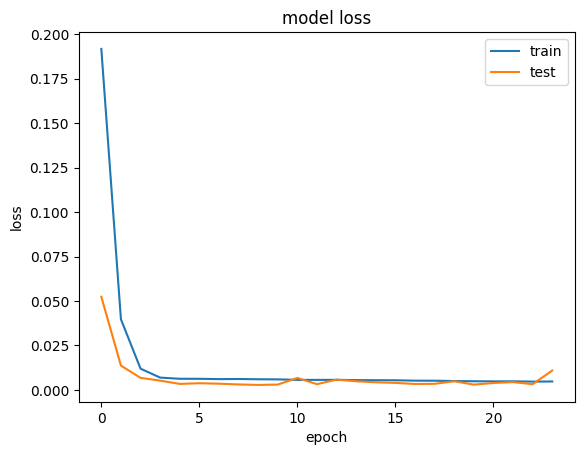

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
y_pred=predictor.predict(X_test)
test_predict=predictor.predict(X_test)
print(test_predict.shape)
predictions_original_scale = scaler.inverse_transform(test_predict)
y_test_original_scale = scaler.inverse_transform(y_test)
# mae=mean_absolute_error(predictions_original_scale,y_test_original_scale,)
# mse=mean_squared_error(predictions_original_scale,y_test_original_scale,)
# rmse=np.sqrt(mse)
# mape=mean_absolute_percentage_error(predictions_original_scale,y_test_original_scale,)

# print(f"RMSE: {rmse:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"MAPE: {mape:.4f}")

(4562, 2)
RMSE: 15.7891
MAE: 8.5691
MAPE: 0.4321


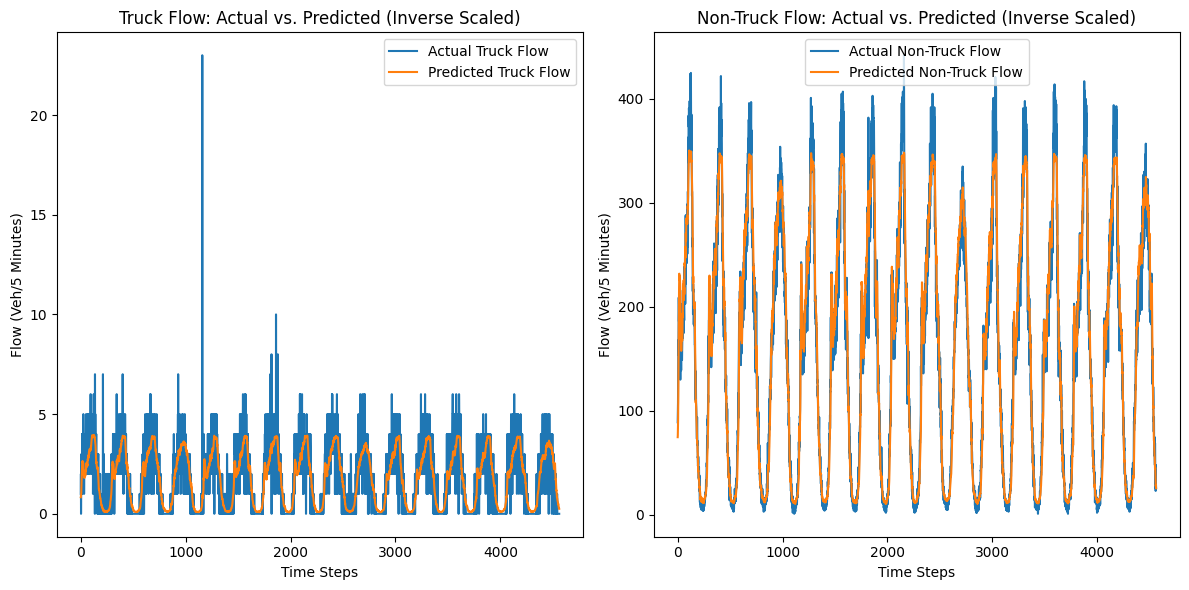

--- Metrics for Truck Flow (Original Scale) ---
RMSE: 1.0268
MAE: 0.7046
MAPE (masked): 40.13%

--- Metrics for Non-Truck Flow (Original Scale) ---
RMSE: 22.3055
MAE: 16.4336
MAPE (masked): 22.43%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.figure(figsize=(12, 6))

#  Truck Flow
plt.subplot(1, 2, 1)
plt.plot(y_test_original_scale[:, 0], label='Actual Truck Flow')
plt.plot(predictions_original_scale[:, 0], label='Predicted Truck Flow')
plt.title('Truck Flow: Actual vs. Predicted (Inverse Scaled)')
plt.xlabel('Time Steps')
plt.ylabel('Flow (Veh/5 Minutes)')
plt.legend()

# Non-Truck Flow
plt.subplot(1, 2, 2)
plt.plot(y_test_original_scale[:, 1], label='Actual Non-Truck Flow')
plt.plot(predictions_original_scale[:, 1], label='Predicted Non-Truck Flow')
plt.title('Non-Truck Flow: Actual vs. Predicted (Inverse Scaled)')
plt.xlabel('Time Steps')
plt.ylabel('Flow (Veh/5 Minutes)')
plt.legend()

plt.tight_layout()
plt.show()

# --- Truck Flow ---
actual_truck_flow = y_test_original_scale[:, 0]
predicted_truck_flow = predictions_original_scale[:, 0]

rmse_truck = np.sqrt(mean_squared_error(actual_truck_flow, predicted_truck_flow))
mae_truck = mean_absolute_error(actual_truck_flow, predicted_truck_flow)

# Masked MAPE
mask_truck = actual_truck_flow != 0
mape_truck = np.mean(
    np.abs((actual_truck_flow[mask_truck] - predicted_truck_flow[mask_truck]) / actual_truck_flow[mask_truck])
) * 100

print(f"--- Metrics for Truck Flow (Original Scale) ---")
print(f"RMSE: {rmse_truck:.4f}")
print(f"MAE: {mae_truck:.4f}")
print(f"MAPE (masked): {mape_truck:.2f}%")

# --- Non-Truck Flow ---
actual_non_truck_flow = y_test_original_scale[:, 1]
predicted_non_truck_flow = predictions_original_scale[:, 1]

rmse_non_truck = np.sqrt(mean_squared_error(actual_non_truck_flow, predicted_non_truck_flow))
mae_non_truck = mean_absolute_error(actual_non_truck_flow, predicted_non_truck_flow)

# Masked MAPE
mask_non_truck = actual_non_truck_flow != 0
mape_non_truck = np.mean(
    np.abs((actual_non_truck_flow[mask_non_truck] - predicted_non_truck_flow[mask_non_truck]) / actual_non_truck_flow[mask_non_truck])
) * 100

print(f"\n--- Metrics for Non-Truck Flow (Original Scale) ---")
print(f"RMSE: {rmse_non_truck:.4f}")
print(f"MAE: {mae_non_truck:.4f}")
print(f"MAPE (masked): {mape_non_truck:.2f}%")

In [ ]:
# import tensorflow as tf

# # Load the trained DBN model saved in Keras format
# model = tf.keras.models.load_model('dbn_model.keras')

# # Create the TFLite converter
# converter = tf.lite.TFLiteConverter.from_keras_model(model)

# # Optimization settings
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_types = [tf.float16]
# converter.target_spec.supported_ops = [
#     tf.lite.OpsSet.TFLITE_BUILTINS,   # Use built-in TF Lite ops
#     tf.lite.OpsSet.SELECT_TF_OPS      # Allow fallback to TF ops if needed
# ]

# # Convert the model
# tflite_model = converter.convert()

# # Save to .tflite file
# with open('dbn_model_fp16.tflite', 'wb') as f:
#     f.write(tflite_model)


In [ ]:
# from google.colab import files

# # Download the quantized model
# files.download("dbn_model_fp16.tflite")